# Let this N=500 simulation run for ~17h 5 min too

In [10]:
using Test
using StaticArrays
using Random
using Plots
import Pkg
using Statistics

Pkg.activate(joinpath(@__DIR__, "../../../"))
using segc_wl   # or the module name inside segc_wl.jl


  Activating project at `~/Documents/montecarlo/segc_wl`


In [11]:
# input_path = joinpath(@__DIR__, "wl_checkpoin.jdl2")

wl = load_wanglandau_jld2("/Users/mckinleypaul/Documents/montecarlo/segc_wl/test/lambda_max_opt/N500_M10_NMin_366/wl_checkpoint.jld2")

WangLandauVars(1.0, [0 0 … 1 10; 0 0 … 17 0; … ; 0 0 … 5 0; 0 0 … 3 0], [0.0 0.0 … 1.0 10.0; 0.0 0.0 … 17.0 0.0; … ; 0.0 0.0 … 5.0 0.0; 0.0 0.0 … 3.0 0.0], 153998297145, 839381407, 51332852855, 27177049549, 205331150000, 4.4e-323)

In [12]:
wl.logf


1.0

In [13]:
println(minimum(wl.H_λN)) # hasnt even visited all states
println(maximum(wl.H_λN)) 


0
20533066534


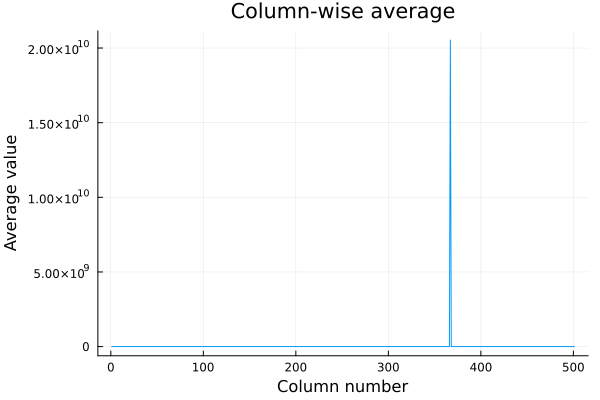

In [14]:


# Example array (remove this if you already have A)
# A = rand(10, 501)
A = wl.H_λN
# -------------------------
# 1. Average of columns vs column index
# -------------------------
col_avg = mean(A, dims=1)[:]      # size: 501
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    title = "Column-wise average",
    legend = false
)

# -------------------------
# 2. Average of rows vs row index
# -------------------------
row_avg = mean(A, dims=2)[:]      # size: 10
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    title = "Row-wise average",
    legend = false
)

# -------------------------
# 3. 3D plot: row, column → value
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

# -------------------------
# Display all three
# -------------------------
plot(p1)



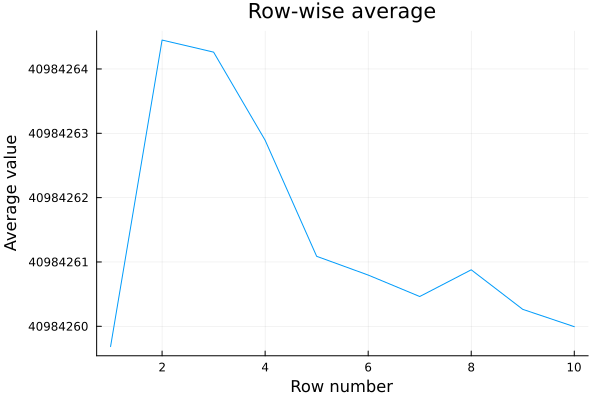

In [15]:
plot(p2)


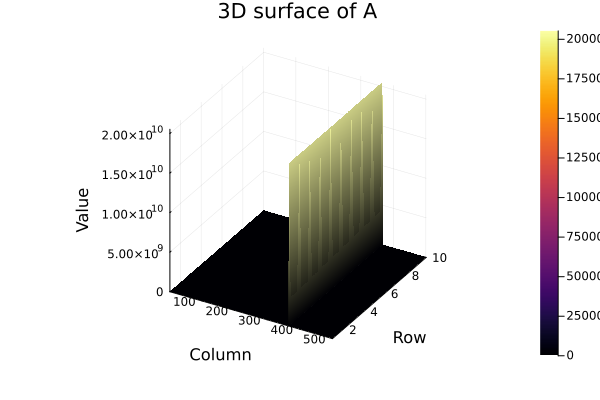

In [16]:
plot(p3)

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/mckinleypaul/.julia/packages/Plots/xC48f/src/utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/mckinleypaul/.julia/packages/Plots/xC48f/src/utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/P

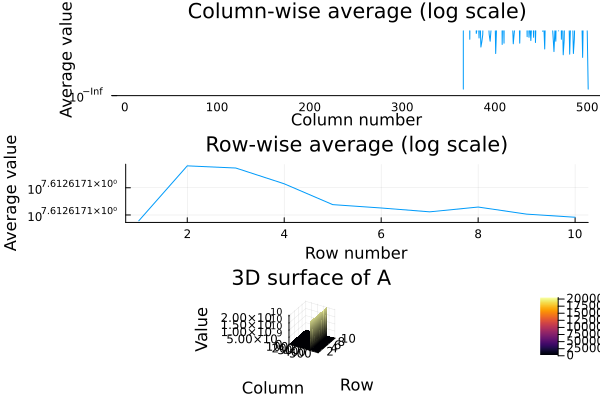

In [17]:
using Statistics
using Plots

# -------------------------
# Column averages (log y)
# -------------------------
col_avg = mean(A, dims=1)[:]
col_idx = 1:size(A, 2)

p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Column-wise average (log scale)",
    legend = false
)

# -------------------------
# Row averages (log y)
# -------------------------
row_avg = mean(A, dims=2)[:]
row_idx = 1:size(A, 1)

p2 = plot(
    row_idx,
    row_avg,
    xlabel = "Row number",
    ylabel = "Average value",
    yscale = :log10,
    title = "Row-wise average (log scale)",
    legend = false
)

# -------------------------
# 3D surface (linear)
# -------------------------
rows = 1:size(A, 1)
cols = 1:size(A, 2)

p3 = surface(
    cols,
    rows,
    A,
    xlabel = "Column",
    ylabel = "Row",
    zlabel = "Value",
    title = "3D surface of A"
)

plot(p1, p2, p3, layout = (3, 1))


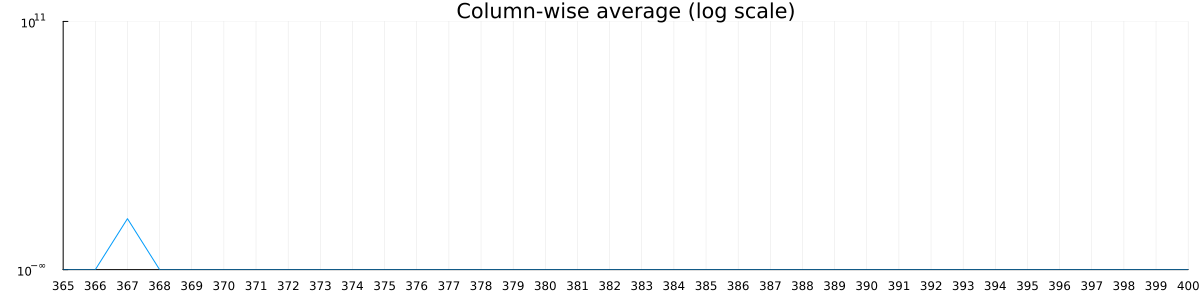

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/mckinleypaul/.julia/packages/Plots/xC48f/src/utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: Invalid negative or zero value 0.0 found at series index 1 for log10 based yscale
└ @ Plots /Users/mckinleypaul/.julia/packages/Plots/xC48f/src/utils.jl:105
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/PlotUtils/HX80C/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/mckinleypaul/.julia/packages/P

In [25]:
p1 = plot(
    col_idx,
    col_avg,
    xlabel = "Column number",
    ylabel = "Average value",
    yscale = :log10,
   ylims = (0,100000000000),
    xlims = (365,400),
    title = "Column-wise average (log scale)",
    legend = false, 
    xticks = 360:1:400,
    size = (1200, 300)
)
plot(p1)